In [1]:
# importing data analysis and visualization libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
# diabetes dataset is stored in Resources folder
# we need to mention the path in read_csv compand
# then creating a pandas dataframe.
df = pd.read_csv(r"Resources\diabetes.csv")
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [91]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130155,0.209151,0.093425,0.081651,0.040595,-0.030615,0.544341,0.221898
Glucose,0.130155,1.000000,0.225141,0.225435,0.516515,0.234377,0.132863,0.268910,0.495990
BloodPressure,0.209151,0.225141,1.000000,0.205173,0.084727,0.277669,0.001002,0.325135,0.174469
SkinThickness,0.093425,0.225435,0.205173,1.000000,0.219504,0.564126,0.098992,0.123260,0.297281
Insulin,0.081651,0.516515,0.084727,0.219504,1.000000,0.254653,0.137688,0.129762,0.423696
BMI,0.040595,0.234377,0.277669,0.564126,0.254653,1.000000,0.119932,0.040892,0.312299
DiabetesPedigreeFunction,-0.030615,0.132863,0.001002,0.098992,0.137688,0.119932,1.000000,0.036705,0.174398
Age,0.544341,0.268910,0.325135,0.123260,0.129762,0.040892,0.036705,1.000000,0.238356
Outcome,0.221898,0.495990,0.174469,0.297281,0.423696,0.312299,0.174398,0.238356,1.000000


In [3]:
# now next step is analyze the structure of the dataset:

print(f"The number of rows in the dataframe is {df.shape[0]}.")
print(f"The number of columns in the dataframe is {df.shape[1]}.")

The number of rows in the dataframe is 768.
The number of columns in the dataframe is 9.


In [4]:
# to know the features name and count of the features:
count = 0
columns_list = []
for i in df.columns:
    columns_list.append(i)
    count += 1
print(columns_list)
print()
print(f"The total of features present inside the dataset is {count}.") 

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

The total of features present inside the dataset is 9.


In [5]:
# next step information of null values and data types
# of each features:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# using .describe function we can understand minimum and 
# maximum values, count of non-null values, mean and 
# standard deviation and also percentiles of each features.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df["Outcome"].unique()
# here we can see the output feature has two values
# so it is classification problem and the output
# value 0 means no diabetes and 1 means diabetes.

array([1, 0], dtype=int64)

In [8]:
# now we know the outcome feature values now we can count them
# and make sure how many of them are positive and negative 
# to diabetes.

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

from above we can see that 500 are negative and 
268 are positive to diabetes.

In [9]:
# first step we need to check we have outliers:

def box_out(dataframe):
    for i in df.columns[:-1]:
        fig = (px.box(data_frame= dataframe, x= i))
        fig.update_layout(title = f"Box plot for {i}",
                        plot_bgcolor = "silver",
                        paper_bgcolor = "silver")
        fig.update_traces(marker_color = "crimson")
        fig.update_xaxes(showgrid = False)
        fig.show()


box_out(dataframe=df)

<AxesSubplot:>

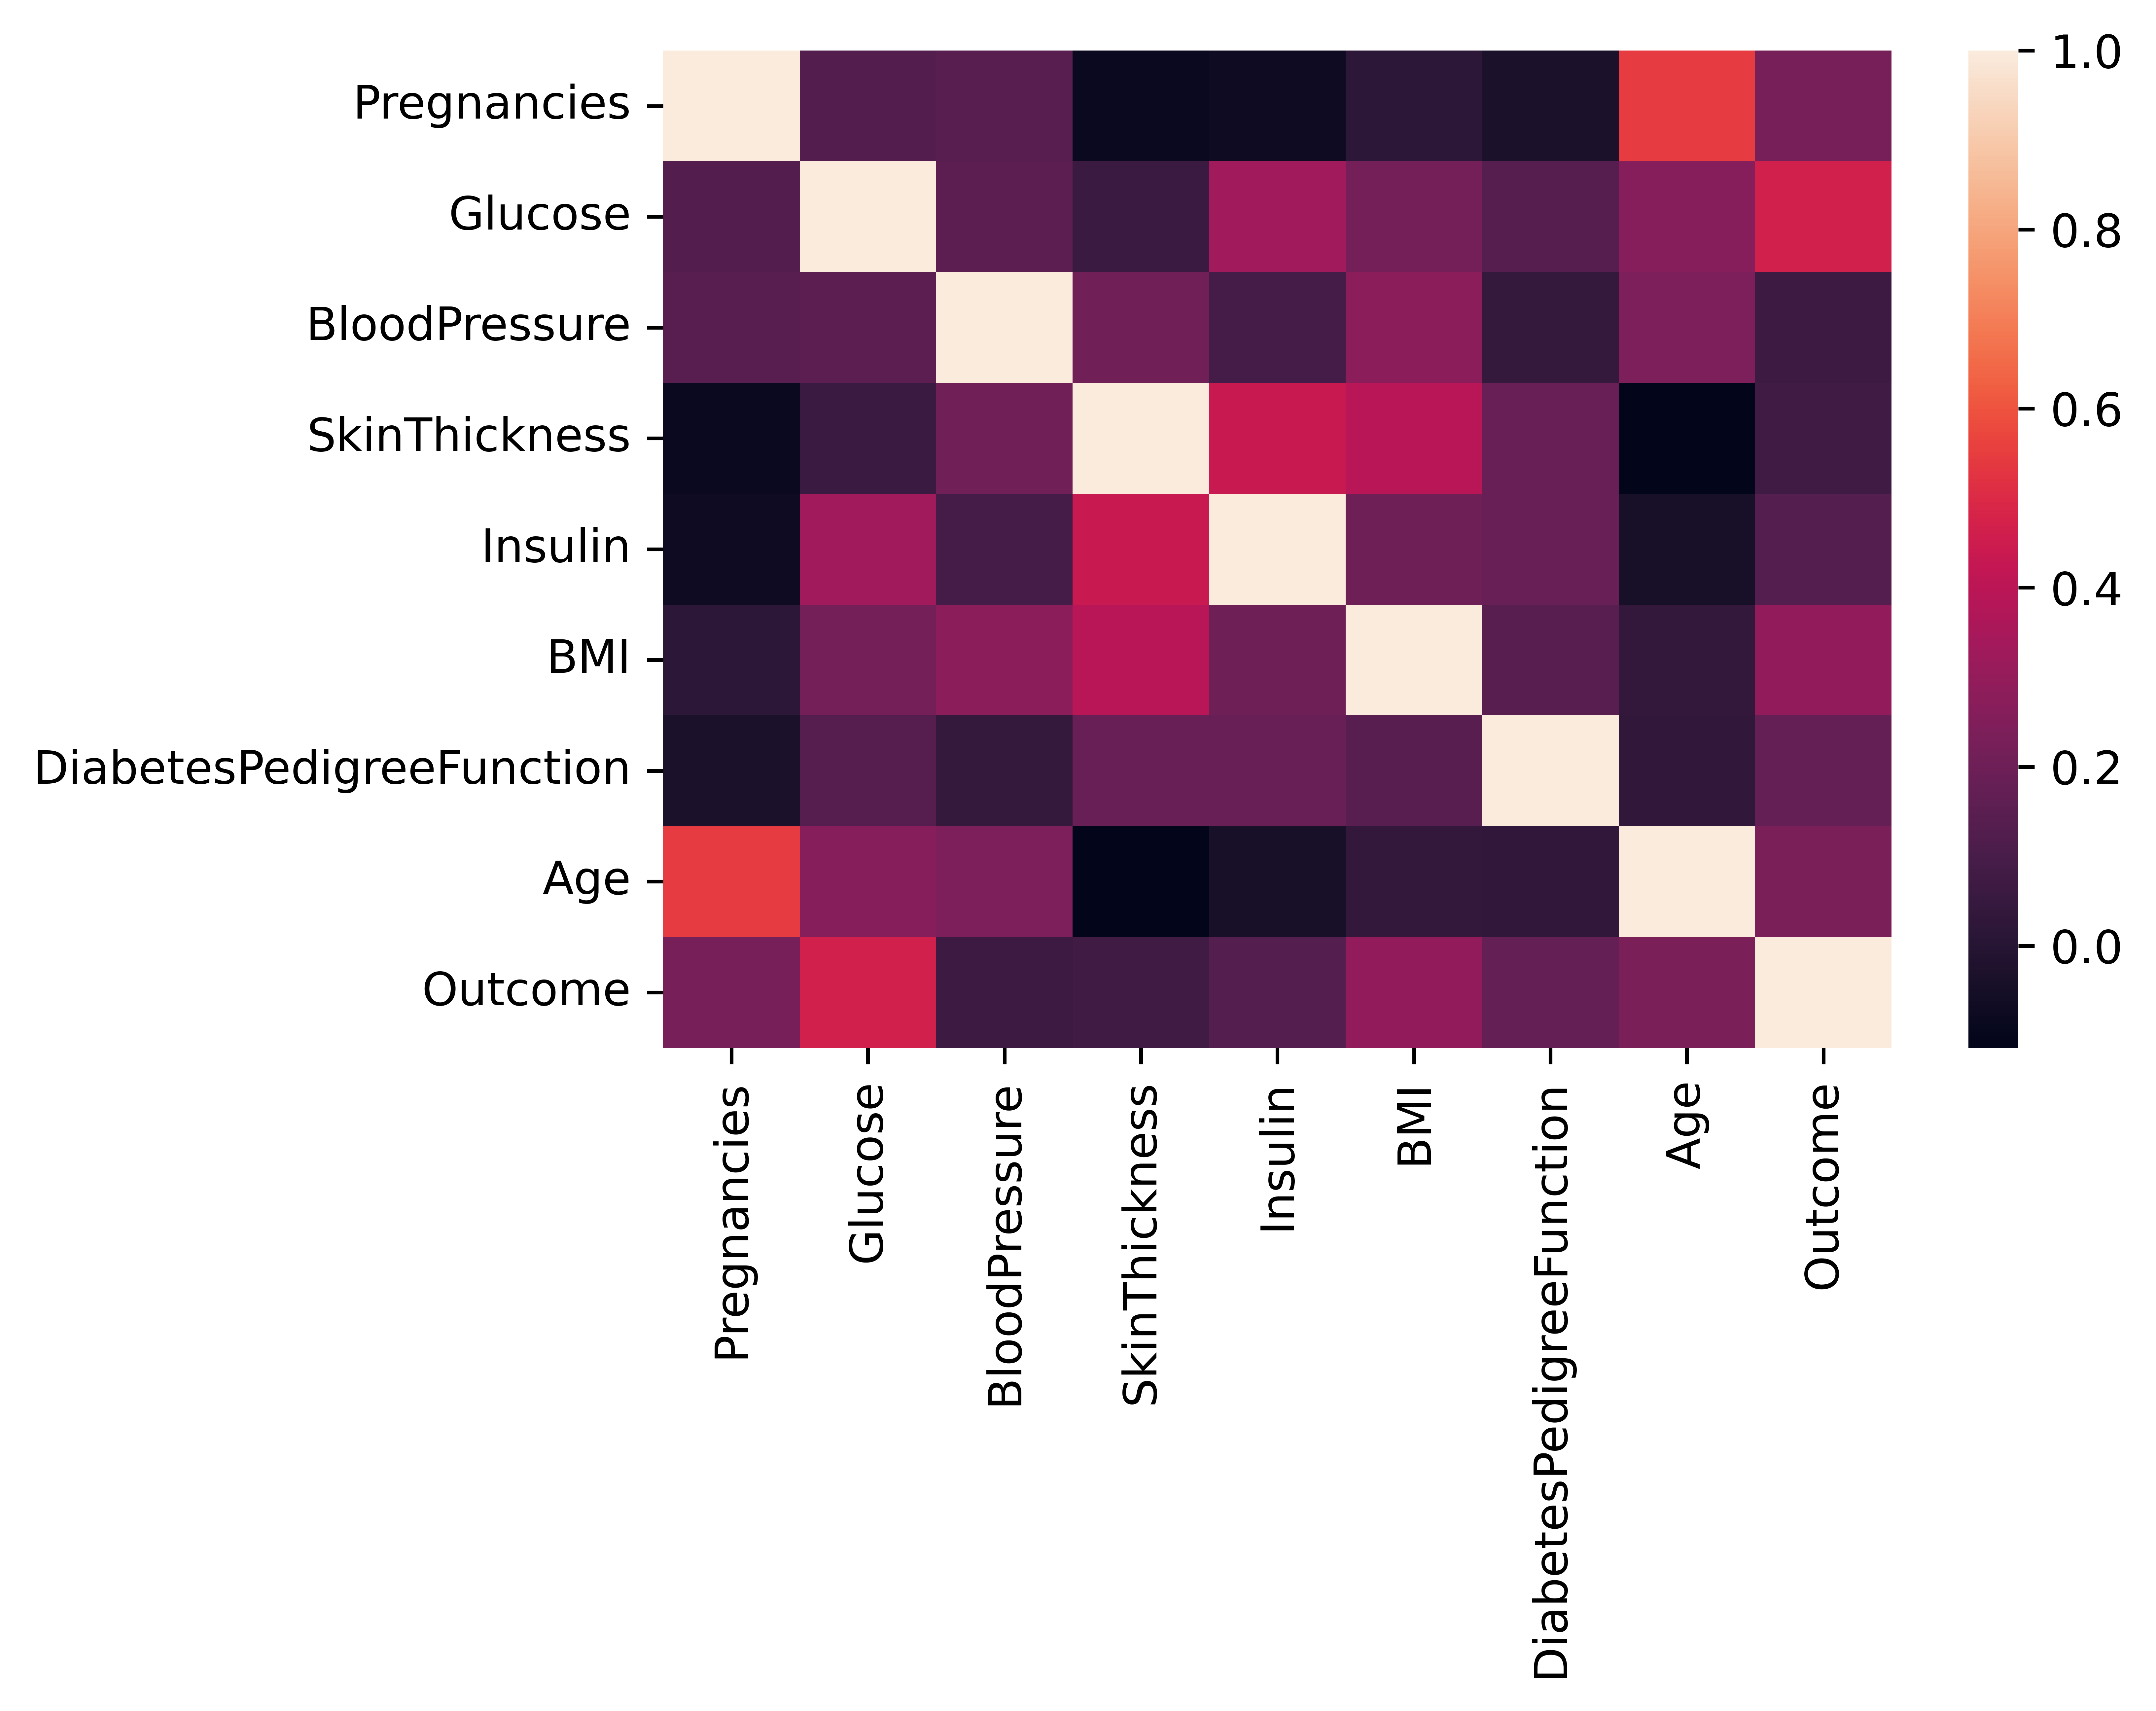

In [10]:
# ploting the correlation matrix:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi = 1000)
sns.heatmap(df.corr())

In [11]:
#we have outliers but also many zeros in dataset if we look
# into dataset so now we can replace zeros with nan or 
# any words and then fill them with statistical methods.

df[df["BMI"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [12]:
# so for example we looked into BMI feature which has 11 records
# BMI 0. There is a chance were some of them are true because
# models mostly referred to zero sized refer to their BMI.
# But here some of them after having many pregancies tend to have
# 0. so here replacing 0 for pregancies more than 0

df["BMI"] = df["BMI"].mask((df["BMI"] == 0) & (df["Pregnancies"] > 0),
            df["BMI"].median())

In [13]:
df[df["BMI"] == 0] # now we successfully changed BMI for people
# BMI has some outliers so we used to median to replace
# rather than mean which is not robust to outliers.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0


In [14]:
# now after BMI we are going to do for the remaining features
# some features can have values to be 0 so they are omitted.

col = ["Insulin","Glucose","BloodPressure","SkinThickness"]

for i in col:
    df[i] = df[i].replace(0, np.NaN)

In [15]:
df.isnull().sum()
# now we can see that there are some features which has 0
# has been replaced with NaN. In reality they are not possible
# to be zero.

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
#now replacing them using statistical concepts:
# we are going to use median basically here instead of mean
# or any ml - algo's:

for i in col:
    df.loc[(df["Outcome"]==0) & (df[i].isnull()),i] = df[df["Outcome"]==0][i].median()
    df.loc[(df["Outcome"]==1) & (df[i].isnull()),i] = df[df["Outcome"]==1][i].median()

In [17]:
# now all the values are filled which has NaN:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outlier Removal:

In [18]:
# we are going to check the outliers presence in the columns using  
# quantile limit as .10 and .90
def outlier_threshold(dataframe, variable):

    q1 = dataframe[variable].quantile(0.10)
    q3 = dataframe[variable].quantile(0.90)
    inter_quantile_range = q3 - q1
    upper_limit = q3 + (1.5 * inter_quantile_range)
    lower_limit = q1 - (1.5 * inter_quantile_range)
    return upper_limit, lower_limit

In [19]:
# checks whether the column has outliers or not based on the upper and lower limit: 
def outliers_present_or_not(dataframe, variable):

    upper_limit, lower_limit = outlier_threshold(dataframe, variable)
    if dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)].any(axis = None):
        print(variable, " yes.")

In [20]:
for i in df.columns[:-1]:
    outliers_present_or_not(df, i)

SkinThickness  yes.
Insulin  yes.
DiabetesPedigreeFunction  yes.


In [21]:
#replacing the outliers with the upper and lower limit.There are multiple ways
# to handle outliers i prefer replacing it with limits here:

def replacing_outliers(dataframe, columns):
    for variable in columns:
        upper_limit, lower_limit = outlier_threshold(dataframe, variable)
        dataframe.loc[(dataframe[variable] > upper_limit), variable] = upper_limit
        dataframe.loc[(dataframe[variable] < lower_limit), variable] = lower_limit

In [22]:
replacing_outliers(df, df.columns[:-1])

In [23]:
# now outliers are replaced:
for i in df.columns:
    outliers_present_or_not(df, i)

In [24]:
# for futher analysis we can use describe function in quantile ranges:

df.describe([0.05,0.10,0.25,0.5,0.75,0.90,1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.055990,138.839844,32.325911,0.470082,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.671056,75.233052,7.167504,0.322171,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
5%,0.000000,80.000000,52.000000,14.350000,50.000000,22.100000,0.140350,21.000000,0.000000
10%,0.000000,86.700000,58.000000,18.000000,67.000000,23.970000,0.165000,22.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000


ML Algorithms For Classification:

In [25]:
# importing all classification algorithmns:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score,\
    train_test_split,KFold,GridSearchCV
from sklearn.metrics import classification_report,\
    roc_auc_score,accuracy_score,roc_curve

Running The Model Without Scaling:

In [26]:
# creating the x and y dataframes for model
x  = df.drop("Outcome", axis = 1) #independent features
y = df["Outcome"] # output feature
y.unique()

array([1, 0], dtype=int64)

In [27]:
models = [('LR', LogisticRegression(max_iter=1000)),
          ('KNN', KNeighborsClassifier()),
          ("ADA", AdaBoostClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=120)
    re = cross_val_score(model, x, y, cv=kfold, scoring="accuracy")
    results.append(re)
    names.append(name)
    print(f"{name}:{re.mean()}")

LR:0.7708988380041012
KNN:0.849008885850991
ADA:0.8672761449077239
CART:0.841250854408749
RF:0.8841250854408749
SVR:0.6510594668489406
XGBM:0.8698393711551606
GB:0.8737354750512646
LightGBM:0.8802631578947369


Now compare the Output after Scaling, some algo's
don't need scaling though and then move on to Hyperparameter
tuning:

In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy import stats

In [38]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x)

In [40]:
models = [('LR', LogisticRegression(max_iter=1000)),
          ('KNN', KNeighborsClassifier()),
          ("ADA", AdaBoostClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

results1 = []
names1 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=120)
    re = cross_val_score(model, x1, y, cv=kfold, scoring="accuracy")
    results1.append(re)
    names1.append(name)
    print(f"{name}:{re.mean()}")

LR:0.7709159261790841
KNN:0.8281613123718387
ADA:0.8672761449077239
CART:0.854254955570745
RF:0.8841250854408749
SVR:0.8463773069036227
XGBM:0.8698393711551606
GB:0.8737354750512646
LightGBM:0.871120984278879


some of the algorithm like support vector machines have hugh say
in scaling the features our output drastically increased.

2. Min Max Scaler:

In [41]:
scaler = MinMaxScaler()
x2 = scaler.fit_transform(x)

In [42]:
models = [('LR', LogisticRegression(max_iter=1000)),
          ('KNN', KNeighborsClassifier()),
          ("ADA", AdaBoostClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

results2 = []
names2 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=120)
    re = cross_val_score(model, x2, y, cv=kfold, scoring="accuracy")
    results2.append(re)
    names2.append(name)
    print(f"{name}:{re.mean()}")

LR:0.7839712918660287
KNN:0.8243164730006836
ADA:0.8672761449077239
CART:0.850358851674641
RF:0.8841763499658237
SVR:0.789166097060834
XGBM:0.8698393711551606
GB:0.8737354750512646
LightGBM:0.8737525632262475


Not much change in the prediction other than svm decreased.

3. Log Transformation:

In [53]:
df1 = pd.DataFrame()
for i in x.columns:
    df1[i] = np.log(x[i])

e:\Machine learning projects\project2\END-TO-END-DIABETES-PREDICTION-USING-ML\venv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log



In [66]:
df1.replace([np.inf, -np.inf],0, inplace=True)

In [67]:
models = [('LR', LogisticRegression(max_iter=1000)),
          ('KNN', KNeighborsClassifier()),
          ("ADA", AdaBoostClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

results3 = []
names3 = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=120)
    re = cross_val_score(model, df1, y, cv=kfold, scoring="accuracy")
    results3.append(re)
    names3.append(name)
    print(f"{name}:{re.mean()}")

LR:0.8034518113465481
KNN:0.8424982911825017
ADA:0.868574846206425
CART:0.8529220779220779
RF:0.8776486671223512
SVR:0.8529220779220779
XGBM:0.872453861927546
GB:0.8698222829801778
LightGBM:0.8737525632262473


Mostly here after transformations does not change alot. still there are tranformations such as box-cox,exponential,reciprocal are left.

Hyper Parameter Tuning Can be Done by applying Gridsearchcv,
Random search Cv. Let's take Top three algo's to work with here.

In [69]:
# Random Forest Classifier:

rf_model = RandomForestClassifier()

rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2).fit(x, y)
print(rf_cv_model.best_params_)

rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(x, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
{'max_depth': None, 'max_features': 7, 'min_samples_split': 10, 'n_estimators': 200}


In [76]:
#Gradient - Boosting Classifier:

gb_model = GradientBoostingClassifier()

gb_params = {"n_estimators" :[100,200], 
             "learning_rate": [0.1,0.001,0.01], 
             "subsample": [0.2,0.4,0.6,0.8,1],
            "max_depth": [3,5,8,None]}
gb_cv_model = GridSearchCV(gb_model, 
                           gb_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2).fit(x, y)
print(gb_cv_model.best_params_)

gb_tuned = GradientBoostingClassifier(**gb_cv_model.best_params_).fit(x, y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}


In [75]:
#lightgbm classifier:

lgm_model = LGBMClassifier()

lgm_params = {"n_estimators" :[100,200], 
             "learning_rate": [0.01,0.1,1], 
             "colsample_bytree": [0.3,0.5,0.8,1.0],
            "max_depth": [3,5,10]}
lgm_cv_model = GridSearchCV(lgm_model, 
                           lgm_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2).fit(x, y)
print(lgm_cv_model.best_params_)

lgm_tuned = LGBMClassifier(**lgm_cv_model.best_params_).fit(x, y)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}


In [77]:
# Now check the accuracy of all hyperparameter tuned models:

models = [('RF', rf_tuned),
          ('GBM',gb_tuned ),
          ("LightGBM", lgm_tuned)]

results4 = []
names4 = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle = True ,random_state=120)
    cv_results = cross_val_score(model, x, y, cv=10, scoring="accuracy")
    results4.append(cv_results)
    names4.append(name)
    print(f"{name}: {cv_results.mean()}.")

RF: 0.8880895420369104.
GBM: 0.898462064251538.
LightGBM: 0.895898838004101.


After Hyperparameter Tuning the prediction is highest of all.
Gradient Boosting gives better prediction than the random 
forest classifier.This can also be increased if fine tune the
model more and adding quality data reocrds than the previous data
we provided earlier.

Always chose the right algorithm for hyper Parameter tuning
Because it takes hugh time to predict the correct parameter
for the dataset.